# Dataset on Salary and Years of exp for Linear Regression

In [1]:
import pandas as pd #To read CSV file
import matplotlib.pyplot as plt #To plot data
import seaborn as sns #Data Visualization
import warnings #To remove inconsequential warnings
import math #for basic mat functions
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
#Read the data
df = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/Aditya Analysis/Salary_Data.csv")

In [3]:
#Basic description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


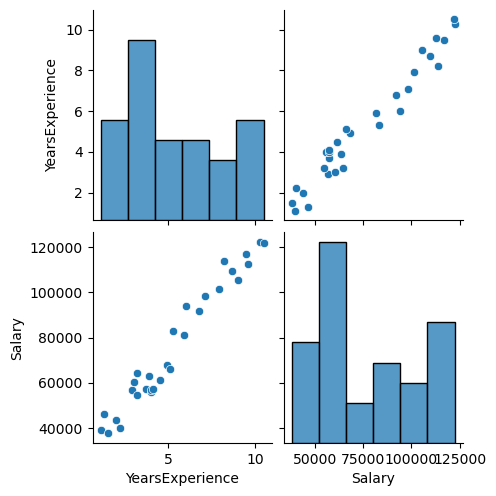

In [5]:
#Pairplot to determine the relation between given columns
#Here we can clearly see that there is a Positive Linear correlation between Salary and Years Experience
sns.pairplot(df)

In [6]:
scaler = StandardScaler()
scaler.fit(df)
df1=scaler.transform(df)

In [7]:
df1

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

<AxesSubplot:ylabel='Density'>

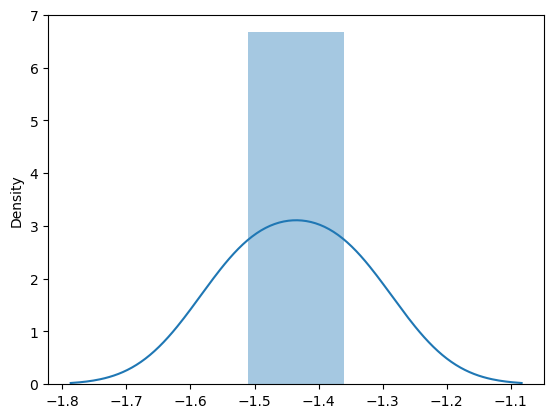

In [8]:
sns.distplot(df1[0])

<AxesSubplot:ylabel='Density'>

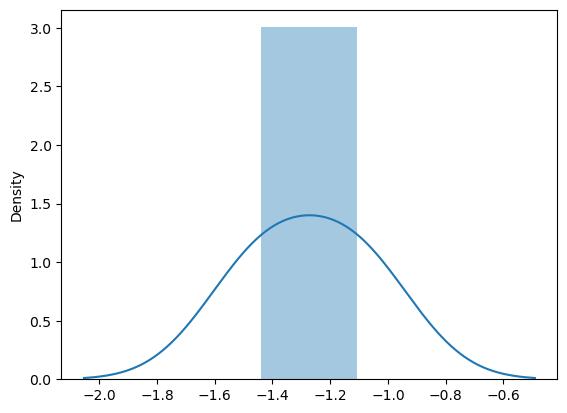

In [9]:
sns.distplot(df1[1])

In [10]:
df2=((pd.Series(df['YearsExperience'])).to_numpy()).reshape(-1,1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df2,df['Salary'],test_size=0.9,random_state=100)

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

r2 = r2_score(Y_test, Y_test_pred)

# Number of features
k = X_train.shape[1]
# Number of observations
n = len(Y_train)

adj_r2_train = 1 - (1-r2_train)*(n-1)/(n-k-1)
adj_r2_test = 1 - (1-r2_test)*(n-1)/(n-k-1)
adj_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
mse = mean_squared_error(Y_test, Y_test_pred)

rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)
rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)

# Print the results
print('R Square for training set:', r2_train)
print('R Square for testing  set:', r2_test, '\n')
print('Adjusted R Square for training set:', adj_r2_train)
print('Adjusted R Square for testing  set:', adj_r2_test, '\n')
print('Mean Squared Error for training set:', mse_train)
print('Mean Squared Error for testing  set:', mse_test, '\n')
print('Root Mean Squared Error for training set:', rmse_train)
print('Root Mean Squared Error for testing  set:', rmse_test,'\n')
print('Mean Absolute Error for training set:', mae_train)
print('Mean Absolute Error for testing  set:', mae_test, '\n')

# Create table
metrics = pd.DataFrame({'MAE': [mae],'MSE': [mse],'RMSE': [rmse],'R-Squared': [r2],'Adjusted R-Squared': [adj_r2]})
                        
# Print table
print(metrics)

R Square for training set: 0.9785251017297407
R Square for testing  set: 0.9420529810252561 

Adjusted R Square for training set: 0.9570502034594814
Adjusted R Square for testing  set: 0.8841059620505123 

Mean Squared Error for training set: 16237379.203621468
Mean Squared Error for testing  set: 41818369.90470756 

Root Mean Squared Error for training set: 4029.563152951132
Root Mean Squared Error for testing  set: 6466.7124495146345 

Mean Absolute Error for training set: 3562.4145555845703
Mean Absolute Error for testing  set: 5494.113326175487 

           MAE           MSE        RMSE  R-Squared  Adjusted R-Squared
0  5494.113326  4.181837e+07  6466.71245   0.942053            0.939735


Text(0.5, 1.0, 'Adjusted R-squared = 0.95')

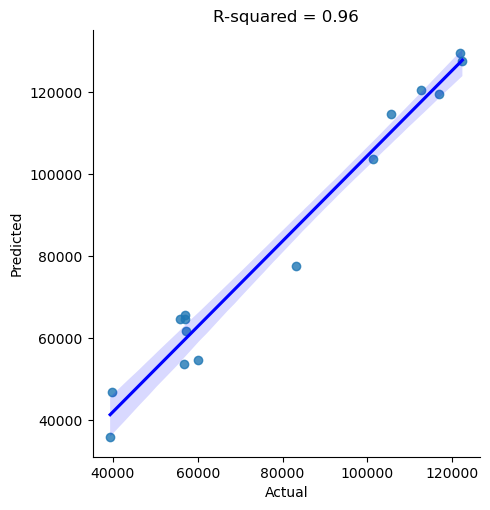

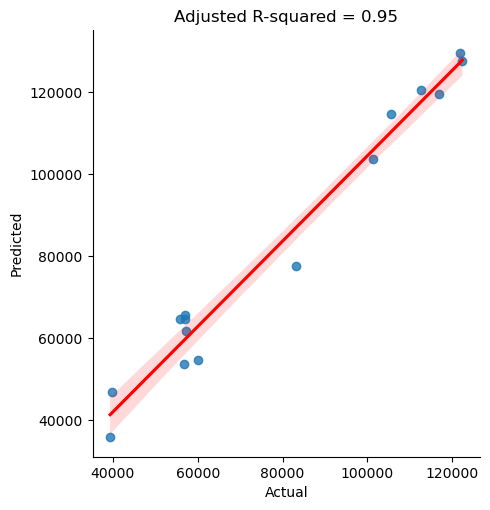

In [13]:
# Create a dataframe with the actual and predicted values
df_plt = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})

# Plot R-squared
sns.lmplot(x='Actual', y='Predicted', data=df_plt, line_kws={'color': 'blue'})
plt.title(f"R-squared = {r2:.2f}")

# Plot Adjusted R-squared
sns.lmplot(x='Actual', y='Predicted', data=df_plt, line_kws={'color': 'red'})
plt.title(f"Adjusted R-squared = {adj_r2:.2f}")

# Best fit line with an accuracy of 95.5%